A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [1]:
import os, sys  

sys.path.append("C:\\Users\\Roxan\\OneDrive\\Documentos\\My_map_2\\Data-science-bootcamp")

In [61]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


import seaborn as sns 
import plot

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from Utils import my_functions

import pickle

import warnings
warnings.filterwarnings('ignore')




In [3]:
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [4]:
#Changing the columns with "%" in it.
col_to_change = [col for col in df.columns if df[col].astype(str).str.contains('%').any()]
for elem in col_to_change:
    print(elem)
    df[elem] = df[elem].apply(lambda x: float(str(x)[:-1]))


Shooting Accuracy
% Goals-to-shots
Passing Accuracy
Saves-to-shots ratio


In [5]:
df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0,20.0,27,1,0,0,...,10,66.7,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0,17.2,40,0,0,0,...,22,88.1,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8,15.6,80,2,1,0,...,10,62.6,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7,19.2,32,1,1,1,...,13,65.1,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0,7.5,110,2,0,0,...,20,74.1,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0,4.1,60,2,0,0,...,12,70.6,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4,5.2,48,0,0,0,...,6,66.7,48,56,3,7,1,7,7,17


In [7]:
#1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

df_corr = df.corr()
df_corr

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.521210,0.533239,0.650109,0.200512,0.730437,0.023094,0.349330,...,0.143912,0.394424,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.504487,0.049623,0.886090,0.212932,0.478610,-0.229945,0.210571,...,0.085059,0.218915,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,-0.269946,-0.389095,0.887032,0.581655,0.126783,-0.173221,0.002284,...,0.086157,0.187128,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Shooting Accuracy,0.521210,0.504487,-0.269946,1.000000,0.548827,0.125994,-0.198917,0.234263,-0.223483,0.485392,...,0.179562,0.220664,0.235577,0.406282,0.382686,0.163668,-1.883518e-01,0.377589,0.377589,-0.022610
% Goals-to-shots,0.533239,0.049623,-0.389095,0.548827,1.000000,-0.195113,-0.087481,0.480954,0.370202,0.384424,...,0.121014,0.238564,0.034561,0.014626,0.255441,-0.071731,-1.669397e-01,0.130146,0.130146,-0.022179
Total shots (inc. Blocked),0.650109,0.886090,0.887032,0.125994,-0.195113,1.000000,0.400121,0.299397,-0.234668,0.125738,...,0.148269,0.252407,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,-0.198917,-0.087481,0.400121,1.000000,-0.076923,-0.041345,0.020174,...,-0.230524,-0.200695,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.234263,0.480954,0.299397,-0.076923,1.000000,0.537484,-0.020174,...,0.058761,0.135145,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.223483,0.370202,-0.234668,-0.041345,0.537484,1.000000,-0.357830,...,0.051019,-0.149787,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.485392,0.384424,0.125738,0.020174,-0.020174,-0.357830,1.000000,...,0.458773,0.578573,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214


In [8]:
#creating list of highly correlated columns. 
indices = np.where(df_corr > 0.5)
indices = [(df_corr.columns[x], df_corr.columns[y]) for x, y in zip(*indices) if x != y and x < y]
indices


[('Goals', 'Shots on target'),
 ('Goals', 'Shooting Accuracy'),
 ('Goals', '% Goals-to-shots'),
 ('Goals', 'Total shots (inc. Blocked)'),
 ('Goals', 'Penalty goals'),
 ('Goals', 'Passes'),
 ('Goals', 'Passes completed'),
 ('Goals', 'Touches'),
 ('Goals', 'Crosses'),
 ('Goals', 'Dribbles'),
 ('Goals', 'Corners Taken'),
 ('Goals', 'Tackles'),
 ('Goals', 'Clean Sheets'),
 ('Goals', 'Fouls Won'),
 ('Goals', 'Offsides'),
 ('Goals', 'Subs on'),
 ('Goals', 'Subs off'),
 ('Shots on target', 'Shots off target'),
 ('Shots on target', 'Shooting Accuracy'),
 ('Shots on target', 'Total shots (inc. Blocked)'),
 ('Shots on target', 'Passes'),
 ('Shots on target', 'Passes completed'),
 ('Shots on target', 'Passing Accuracy'),
 ('Shots on target', 'Touches'),
 ('Shots on target', 'Crosses'),
 ('Shots on target', 'Dribbles'),
 ('Shots on target', 'Corners Taken'),
 ('Shots on target', 'Tackles'),
 ('Shots on target', 'Interceptions'),
 ('Shots on target', 'Clean Sheets'),
 ('Shots on target', 'Fouls Won

In [9]:
#finding correlated columns with target column
cor_target = abs(df_corr["Goals"])
#relevant_features = cor_target[cor_target>0.3]
cor_target.sort_values(ascending=False)

Goals                         1.000000
Passes                        0.838497
Touches                       0.837760
Passes completed              0.830062
Shots on target               0.804193
Tackles                       0.796830
Clean Sheets                  0.792559
Penalty goals                 0.730437
Subs on                       0.727830
Subs off                      0.727830
Offsides                      0.703043
Corners Taken                 0.697240
Dribbles                      0.693998
Crosses                       0.667097
Fouls Won                     0.663876
Total shots (inc. Blocked)    0.650109
% Goals-to-shots              0.533239
Shooting Accuracy             0.521210
Fouls Conceded                0.483833
Interceptions                 0.482441
Passing Accuracy              0.438994
Shots off target              0.403821
Saves-to-shots ratio          0.394424
Red Cards                     0.358057
Headed goals                  0.349330
Yellow Cards             

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

In [10]:
#correlation between Goals and shooting accuracy. 
df['Shooting Accuracy'].corr(df['Goals'])

0.5212095324544347

---------

In [5]:
X = df[['Shooting Accuracy']].values
y = df['Goals'].values

#X = X.reshape(1, -1)
#y= y.reshape(1, -1)

In [6]:
X.shape

(16, 1)

In [7]:
#split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape

(12, 1)

In [ ]:
### Linear regression

-0.2718471664380968


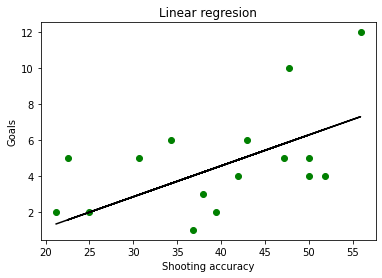

In [22]:
model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)

plt.scatter(X, y, color='g')
plt.plot(X, model.predict(X), color='k')
plt.title("Linear regresion")
plt.ylabel("Goals")
plt.xlabel("Shooting accuracy")
plt.show()

In [28]:
#Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?
coef = model.coef_
pd.DataFrame(coef, [["Linear regression"]], columns=['Coefficient'])

,Coefficient
Linear regression,0.171963


-0.6293246499251537


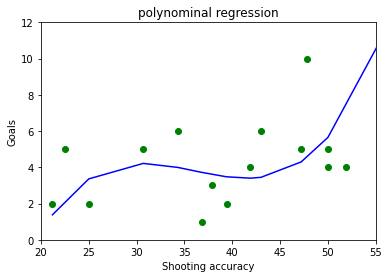

In [29]:
## Polynominal features

polinominal_model = PolynomialFeatures(degree=3) 
X_poly = polinominal_model.fit_transform(X_train, y_train)


lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)

y_pred = lin_reg_model.predict(X_poly)

X_test_poly = polinominal_model.fit_transform(X_test, y_test)
score = lin_reg_model.score(X_test_poly, y_test)
print(score)


plt.xlim(20,55)
plt.ylim(0,12)
plt.ylabel("Goals")
plt.xlabel("Shooting accuracy")

X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X, y, color="green")
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color="blue")


plt.title("polynominal regression")
plt.show()

In [30]:
#Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?
coef = model.coef_
pd.DataFrame(coef, [["Linear regression"]], columns=['Coefficient'])

,Coefficient
Linear regression,0.171963


In [14]:
##SVM
new_model =  SVR()

param_grid = [
    {'kernel' : ['linear', 'poly', 'rbf'],
    'degree' : [1, 3, 5],
    'gamma' :  ['scale']
    }
]

clf = GridSearchCV(new_model, param_grid=param_grid, verbose=10, cv=2, n_jobs=-1)


best_clf = clf.fit(X, y)
best_clf.best_estimator_

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0219s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.3s finished


SVR(degree=1, kernel='linear')

-0.29275837563789464


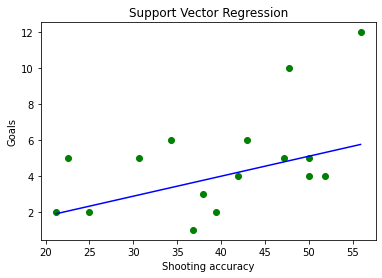

In [31]:
 #SVM 
 
model = SVR(degree=1, kernel='linear')
model.fit(X_train, y_train)
y_prediction = model.predict(X_train)
score = model.score(X_test, y_test)
print(score)
y_pred = model.predict(X)



plt.scatter(X, y, color = 'green')
X_to_show, y_pred = zip(*sorted(zip(X_train, y_prediction)))
plt.plot(X_to_show, y_pred, color="blue")
plt.title("Support Vector Regression")
plt.ylabel("Goals")
plt.xlabel("Shooting accuracy")
plt.show() 


In [32]:
#Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?
coef = model.coef_
pd.DataFrame(coef, [["Linear regression"]], columns=['Coefficient'])

,Coefficient
Linear regression,0.111108


3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

% de goles por disparo: 40%
Total shots (inc. Blocked): 102
Corners Taken: 5
Passes: 82
Dribbles: 23

In [75]:
to_pred = [[40, 102, 5, 82, 23]]

In [64]:
le = LabelEncoder()
goals_transformed = le.fit_transform(df["Goals"])

X = df[["% Goals-to-shots", "Total shots (inc. Blocked)", "Corners Taken", "Passes", "Dribbles"]].values
y = goals_transformed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape

(12, 5)

In [79]:
## logistic regression

#finding best parameters

new_model = LogisticRegression()

param_grid = [
    {'penalty' : ['l1', '12',  'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [100, 1000, 2500, 5000]}
]

clf = GridSearchCV(new_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=5)

best_clf = clf.fit(X, y)
best_clf.best_estimator_

Fitting 2 folds for each of 1600 candidates, totalling 3200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:   16.5s finished


LogisticRegression(C=206.913808111479, penalty='l1', solver='liblinear')

In [78]:
scores_models = []
predictions = []
model = LogisticRegression(C=206.913808111479, max_iter=1000, penalty='l1',
                   solver='liblinear')

kfo_ld = KFold(n_splits=4, random_state=1)

val_score = [model.fit(X_train[train], y_train[train]).score(X_train[val], y_train[val]) for train, val in k_fold.split(X_train)]
print("During training, val score: ", val_score)

score_logistic_reg = model.score(X=X_test, y=y_test)
scores_models.append(score_logistic_reg)
print("Score of model Logistic Regression:", score_logistic_reg)

y_test_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
print("MAE of model Logistic Regresion:", mae)

log_res_predict_goals = model.predict(to_pred)
log_res_predict_goals = le.inverse_transform(log_res_predict_goals)
print("predictions:", log_res_predict_goals)
predictions.append(log_res_predict_goals)





During training, val score:  [0.3333333333333333, 0.0, 0.3333333333333333, 0.0]
Score of model Logistic Regression: 0.0
MAE of model Logistic Regresion: 3.5
predictions: [5]


In [ ]:
#model is not learning? why is score 0?

In [80]:
## SVM 
#finding best parameters

new_model = svm.SVC()

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

clf = GridSearchCV(new_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=5)

best_clf = clf.fit(X, y)
best_clf.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    7.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   10.2s finished


SVC(C=1, gamma=0.001)

In [82]:
model  = svm.SVC(C=1, gamma=0.001)

k_fold = KFold(n_splits=4, random_state=1)

val_score = [model.fit(X_train[train], y_train[train]).score(X_train[val], y_train[val]) for train, val in k_fold.split(X_train)]
print("During training, val score: ", val_score)

score_SVM = model.score(X=X_test, y=y_test)
scores_models.append(score_SVM)
print("Score of SVM:", score_SVM)

y_test_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
print("MAE of model SVM:", mae)

svm_predict_goals = model.predict(to_pred)
svm_predict_goals = le.inverse_transform(svm_predict_goals)
print("predictions:", svm_predict_goals)
predictions.append(svm_predict_goals)

During training, val score:  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0]
Score of SVM: 0.25
MAE of model SVM: 1.25
predictions: [5]


In [84]:
##Random forest
#finding best parameters

new_model = RandomForestClassifier()

param_grid = [
    {'n_estimators' : [50, 100, 200],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2']
    }
]

clf = GridSearchCV(new_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=5)

best_clf = clf.fit(X, y)
best_clf.best_estimator_

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:   10.1s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   10.9s finished


RandomForestClassifier(n_estimators=50)

In [85]:
model  = RandomForestClassifier(n_estimators=50)

k_fold = KFold(n_splits=4, random_state=1)

val_score = [model.fit(X_train[train], y_train[train]).score(X_train[val], y_train[val]) for train, val in k_fold.split(X_train)]
print("During training, val score: ", val_score)

score_tree_classifier = model.score(X=X_test, y=y_test)
scores_models.append(score_tree_classifier)
print("Score of Random Forest Classifier :", score_tree_classifier)

y_test_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
print("MAE of model SVM:", mae)

tree_classifier_goals = model.predict(to_pred)
tree_classifier_goals = le.inverse_transform(tree_classifier_goals)
print("predictions:", tree_classifier_goals)
predictions.append(tree_classifier_goals)

During training, val score:  [0.6666666666666666, 0.0, 0.3333333333333333, 0.3333333333333333]
Score of Random Forest Classifier : 0.0
MAE of model SVM: 1.5
predictions: [5]


----------

In [114]:
df_predictions = pd.DataFrame(predictions, index=["Logistic Regression", "SVM", "Random Forest"])
df_predictions.rename(columns={0: "Predicted Goals"}, inplace=True)
df_predictions["Score"] = scores_models
df_predictions

,Predicted Goals,Score
Logistic Regression,5,0.00
SVM,5,0.25
Random Forest,5,0.00


for: % de goles por disparo: 40% Total shots (inc. Blocked): 102 Corners Taken: 5 Passes: 82 Dribbles: 23. 

The predictions of all models is 5 goals, but as the score is very low, the predictions is most likely not correct. 